Importing the libraries to perform the classification

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras import Model
import seaborn as sns


Loading the directory where the images are stored

In [2]:
PATH1 = os.getcwd()+'/Skin_Cancer/train_dir'
PATH2 = os.getcwd()+'/Skin_Cancer/val_dir'


In [3]:
os.listdir(PATH1)

['akiec', '.DS_Store', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel']

Creating our datasets for the purpose of analysis

In [36]:
# Image generator for training (includes data augmentation)
imgTrainGen = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True, # Divide each input by its standard deviation]
    rescale=1./255
)

# Image generator for testing (didn't include augmentation)
imgTestGen = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,  # Set each sample mean to 0.
    # Divide each input by its standard deviation]
    samplewise_std_normalization=True,
    rescale=1./255
)
# Build for training
trainGeneratorBuild = imgTrainGen.flow_from_directory(
    PATH1,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 10,
    shuffle= True

)
# Build for testing
testGeneratorBuild = imgTestGen.flow_from_directory(
    PATH2,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 10,
    shuffle=True
)


Found 38568 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


Creating our custom CNN model for training the HAM10000 Dataset.

In [37]:
#using the keras functional api's to build our Convolutional Neural Network Model
print("----Building the model----")
i = Input(shape=(224, 224, 3))  # defining input
x = BatchNormalization()(i)#performing batch normalization
x = Conv2D(16, 3, activation='relu')(i)  # adding convolution layers
x = MaxPooling2D(2,2)(x) #performing maxpooling
x = Dropout(0.2)(x) #adding dropout to prevent overfitting of the model to the data.
x = Conv2D(32, 3, activation='relu')(i)  # adding convolution layers
x = MaxPooling2D(2, 2)(x)  # performing maxpooling
# adding dropout to prevent overfitting of the model to the data
x = Dropout(0.2)(x)
x = Conv2D(64, 3, activation='relu')(x) # adding convolution layers
x = MaxPooling2D(2, 2)(x)  # performing maxpooling
x = Dropout(0.2)(x)
x = Conv2D(128, 3, activation='relu')(x) # adding convolution layers
x = MaxPooling2D(2, 2)(x)  # performing maxpooling
# adding dropout to prevent overfitting of the model to the data
x = Dropout(0.2)(x)
x = Conv2D(256,3, activation='relu')(x) 
x = MaxPooling2D(2, 2)(x)  # performing maxpooling
x = Dropout(0.2)(x)
#adding dropout to prevent overfitting of the model to the data
x = Flatten()(x) #adding flatten layer to pass the output as a single dimension vector.
x = Dense(7, activation='softmax')(x) #adding the final fully connected layer to output 7 classes.

model = Model(i, x)
model.summary()



----Building the model----
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_35 (Dropout)         (No

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', #compiling the model
              metrics=['accuracy'])

In [39]:
# destination to save our model
filepath = "/Users/aqdus/desktop/Skin/cnn_model.h5"
mc = ModelCheckpoint(filepath, monitor='val_loss',
                     mode='min', verbose=1, save_best_only=True)


In [40]:
#fitting our model and running it with hyperparameter tuning.
history = model.fit(trainGeneratorBuild, batch_size=10, epochs=10, validation_data=testGeneratorBuild, callbacks=[mc], verbose=1,steps_per_epoch=908, validation_steps=94)


Epoch 1/10
  1/908 [..............................] - ETA: 4:41 - loss: 1.9681 - accuracy: 0.1000

2022-05-01 15:01:48.773927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


908/908 [==============================] - ETA: 0s - loss: 1.6274 - accuracy: 0.3598

2022-05-01 15:02:51.696932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


908/908 [==============================] - 69s 75ms/step - loss: 1.6274 - accuracy: 0.3598 - val_loss: 1.3709 - val_accuracy: 0.5394

Epoch 00001: val_loss improved from inf to 1.37090, saving model to /Users/aqdus/desktop/Skin/cnn_model.h5
Epoch 2/10
908/908 [==============================] - 69s 76ms/step - loss: 1.3357 - accuracy: 0.4742 - val_loss: 0.9739 - val_accuracy: 0.7825

Epoch 00002: val_loss improved from 1.37090 to 0.97388, saving model to /Users/aqdus/desktop/Skin/cnn_model.h5
Epoch 3/10
908/908 [==============================] - 70s 77ms/step - loss: 1.2142 - accuracy: 0.5274 - val_loss: 1.0296 - val_accuracy: 0.7377

Epoch 00003: val_loss did not improve from 0.97388
Epoch 4/10
908/908 [==============================] - 68s 75ms/step - loss: 1.1348 - accuracy: 0.5557 - val_loss: 0.8426 - val_accuracy: 0.7783

Epoch 00004: val_loss improved from 0.97388 to 0.84265, saving model to /Users/aqdus/desktop/Skin/cnn_model.h5
Epoch 5/10
908/908 [==============================]

Calculating overall Train and Validation Score.

In [43]:
print("Train score:", model.evaluate(trainGeneratorBuild))
print("Validation score:", model.evaluate(testGeneratorBuild))
n_epochs = len(history.history['loss'])


3857/3857 [==============================] - 107s 28ms/step - loss: 0.8637 - accuracy: 0.6665
Train score: [0.8636830449104309, 0.6664592623710632]
94/94 [==============================] - 6s 63ms/step - loss: 0.5594 - accuracy: 0.8241
Validation score: [0.5593734979629517, 0.8240938186645508]


Plotting:
1. Train and Validation accuracy
2. Train and Validation loss


In [44]:
def plotLearningCurve(history, epochs):
  epochRange = range(1, epochs+1)
  fig, ax = plt.subplots(1, 2, figsize=(20, 10))
  ax[0].plot(epochRange, history.history['accuracy'],
             'b', label='Training Accuracy')
  ax[0].plot(epochRange, history.history['val_accuracy'],
             'r', label='Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch', fontsize=20)
  ax[0].set_ylabel('Accuracy', fontsize=20)
  ax[0].legend()
  ax[0].grid(color='gray', linestyle='--')
  ax[1].plot(epochRange, history.history['loss'], 'b', label='Training Loss')
  ax[1].plot(epochRange, history.history['val_loss'],
             'r', label='Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch', fontsize=20)
  ax[1].set_ylabel('Loss', fontsize=20)
  ax[1].legend()
  ax[1].grid(color='gray', linestyle='--')
  plt.show()


The graph for tarining and validation accuracy and loss.

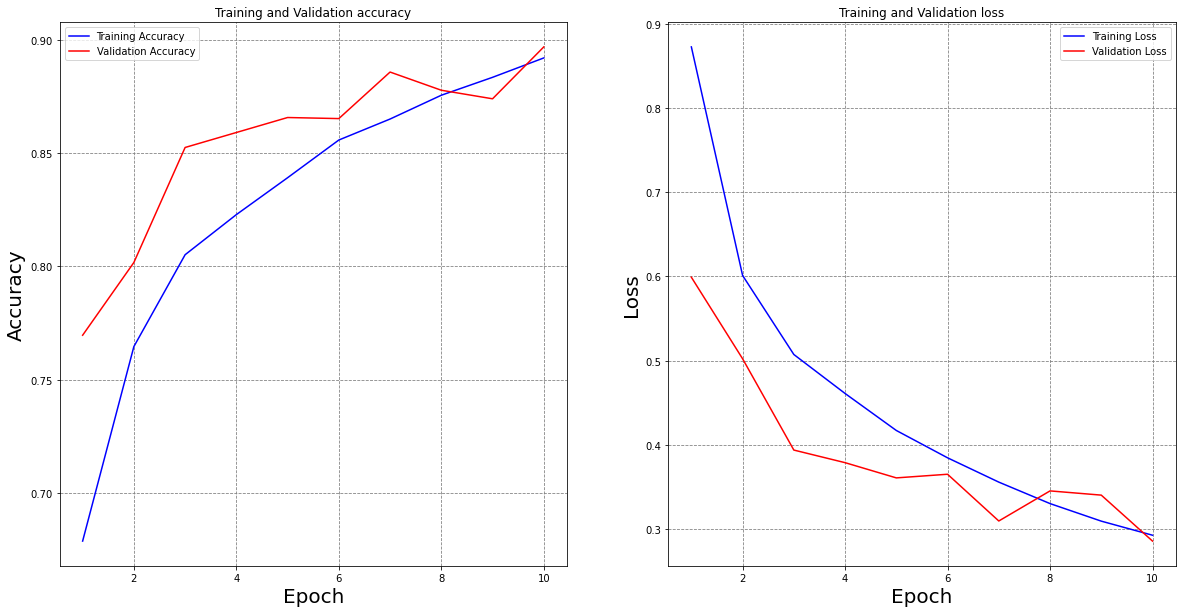

In [ ]:
plotLearningCurve(history, n_epochs)


Testing our model with sample unknown Skin cancer Images.

In [45]:
from tensorflow.keras.preprocessing import image


def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224, 224, 3))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)

  return img


2022-05-01 15:29:34.034356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


The given Skin_Cancer image is of type = bkl

The chances of image being akiec is : 0.0 percent

The chances of image being bcc is : 0.0 percent

The chances of image being bkl  is : 100.0 percent

The chances of image being df is : 8.408490646382577e-12 percent

The chances of image being mel is : 0.0 percent

The chances of image being nv  is : 0.0 percent

The chances of image being vasc is : 0.0 percent



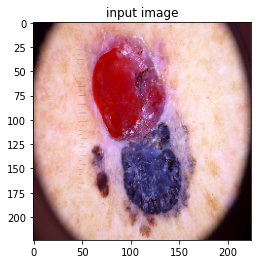

In [47]:
# path for that new image.
PATH = os.getcwd()+'/ISIC_0025234.jpg'
# you can add any image path
img = get_img_array(PATH)
classes=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
res = classes[np.argmax(model.predict(img))]
print(f"The given Skin_Cancer image is of type = {res}")
print()
print(
    f"The chances of image being akiec is : {model.predict(img)[0][0]*100} percent")
print()
print(
    f"The chances of image being bcc is : {model.predict(img)[0][1]*100} percent")
print()
print(
    f"The chances of image being bkl  is : {model.predict(img)[0][2]*100} percent")
print()
print(
    f"The chances of image being df is : {model.predict(img)[0][3]*100} percent")
print()
print(
    f"The chances of image being mel is : {model.predict(img)[0][4]*100} percent")
print()
print(
    f"The chances of image being nv  is : {model.predict(img)[0][5]*100} percent")
print()
print(
    f"The chances of image being vasc is : {model.predict(img)[0][6]*100} percent")
print()

# to display the image
plt.imshow(img[0]/255, cmap="gray")
plt.title("input image")
plt.show()
